In [1]:
# %reset 
import numpy as np
import time

# Trapezoidal rule

In [2]:
# def f(x):
#     return x**4 - 2*x + 1

# N = 10000
# a,b = 0,2
# h = (b-a)/N
# points = np.linspace(a,b, N+1)

# # Regular for loop
# start = time.time()

# area = 0
# for i in range(N):
#     f1, f2 = f(points[i]), f(points[i+1])
#     area += 0.5*h*(f1+f2)'

# end1 = time.time()

# print(f'trapz (loop): {area}, execution time: {end1 - start}')


# # Vectorized for faster computation 
# func_vals = f(points)
# integral = h*((0.5)*func_vals[0] + 0.5*func_vals[-1] + np.sum(func_vals[1:-1]))

# end2 = time.time()

# print(f'trapz (vectorized): {integral}, execution time: {end2-end1}')




# Simpson's Rule

In [3]:
# N = 10000 #even slices only
# a,b = 0,2 
# h = (b-a)/N 
# points = np.linspace(a,b, N+1)

# start = time.time()

# area = 0 
# for i in range(N//2):
#     #print(f'quadratic curve number: {i}')
#     p1, p2, p3 = a+2*i*h, a + (2*i+1)*h, a + (2*i+2)*h 
#     #print(f'(p1,p2,p3): {(p1,p2,p3)}')
#     cumulate = (h/3)*(f(p1)+4*f(p2)+f(p3))
#     area += cumulate
#     #print(f'area: {cumulate} \n')

# end1 = time.time()

# print(f'simpsons (loop): {area}, execution time: {end1 - start}')

# # Vectorize for faster computation 
# func_vals = f(points) 
# size = len(func_vals)
# odds = func_vals[[k for k in range(1,size,2)]]
# evens = func_vals[[i for i in range(2,size-1,2)]]
# integral = (h/3)*(func_vals[0] + func_vals[-1] + 4*np.sum(odds) + 2*np.sum(evens))

# end2 = time.time()

# print(f'simpsons (vectorized): {integral}, execution time: {end2-end1}')

In [4]:
def simpson(f, a, b, N):
    ''' f: function or integrand (must be a Python function)
    a: lower bound 
    b: upper bound
    N: number of slices
    '''
    h = (b-a)/N 
    points = np.linspace(a,b, N+1) 
    func_vals = f(points) 
    size = len(func_vals)
    odds = func_vals[[k for k in range(1,size,2)]]
    evens = func_vals[[i for i in range(2,size-1,2)]]
    integral = (h/3)*(func_vals[0] + func_vals[-1] + 4*np.sum(odds) + 2*np.sum(evens))
    return integral

def trapezoid(f,a,b, N):
    ''' f: function or integrand (must be a Python function)
    a: lower bound 
    b: upper bound
    N: number of slices 
    '''
    h = (b-a)/N 
    points = np.linspace(a,b, N+1)
    func_vals = f(points)
    integral = h*((0.5)*func_vals[0] + 0.5*func_vals[-1] + np.sum(func_vals[1:-1]))
    return integral 

In [5]:
def f(x): #test function
    return x**4 - 2*x + 1 

print(f'Simpson approximation: {simpson(f, 0, 1, 10)}')
print(f'Trapezoid approximation: {trapezoid(f, 0, 1, 10)}')

Simpson approximation: 0.20001333333333332
Trapezoid approximation: 0.20332999999999998


# Exercises

**Exercise 5.3:** Evaluate the integral
$$
E(x) = \int_0^{x}e^{-t^2}\text{d} t
$$
where $x \in [0,3]$ in steps of $0.1$

In [6]:
def integrand(x):
    return np.exp(-x**2)

a,b = 0,3
step = 0.1
N=1000
x_vals= np.arange(a,b+step,step)
y_vals_simpson = np.array([simpson(integrand, 0, x, N) for x in x_vals])
y_vals_trapz= np.array([trapezoid(integrand, 0, x, N) for x in x_vals])

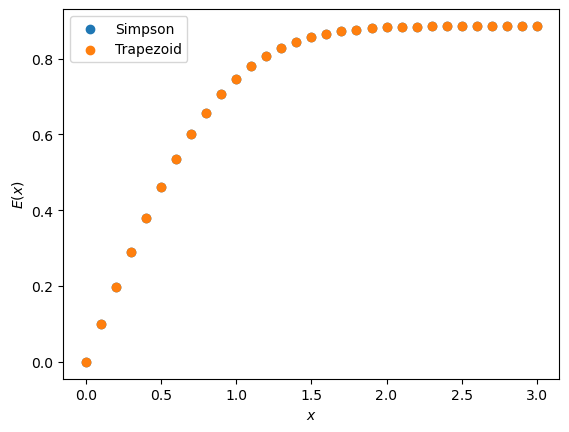

In [7]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
plt.rcdefaults()

plt.scatter(x_vals, y_vals_simpson, label='Simpson')
plt.scatter(x_vals, y_vals_trapz, label='Trapezoid')
plt.xlabel(r'$x$')
plt.ylabel(r'$E({})$'.format('x'))
plt.legend(loc='best')

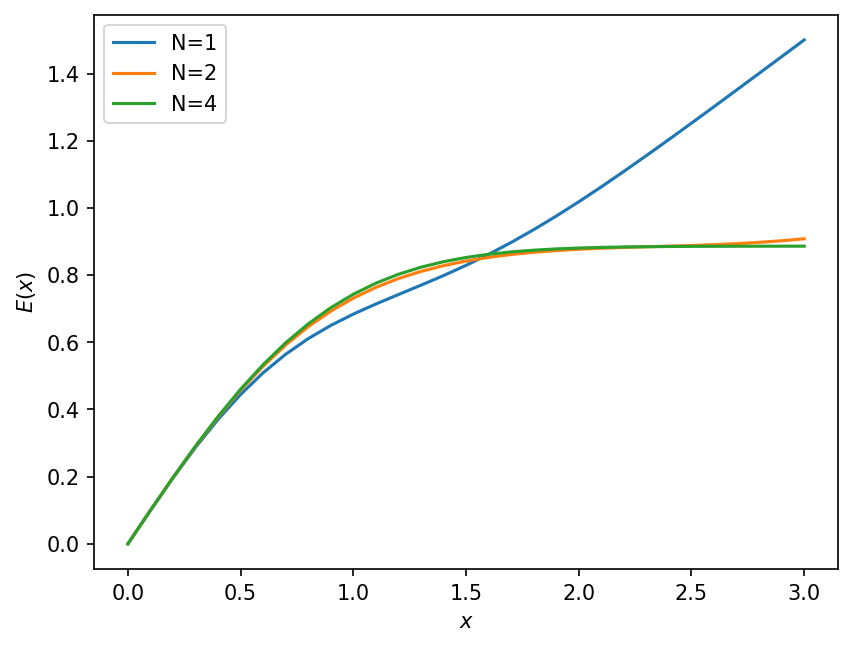

In [8]:
def integrand(x):
    return np.exp(-x**2)

slices=[1,2,4]
step = 0.1
a,b = 0, 3
x_vals = np.arange(a, b+step, step)
plt.figure(dpi=150)
for slice in slices:
    y_vals = np.array([trapezoid(integrand, 0, x, slice) for x in x_vals])
    plt.plot(x_vals, y_vals, label=r'N={}'.format(slice))
plt.xlabel(r'$x$')
plt.ylabel(r'$E(x)$')
plt.legend(loc='best')
plt.savefig('Error function integration.png', dpi=300)

**Exercise 5.4: The diffraction limit of a telescope**


**(a)** Write a Python function $J(m,x)$ that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points. Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of x from $x = 0$ to $x = 20$.

$$J_m(x) = \frac{1}{\pi}\int_0^{\pi}\cos(m\theta - x\sin \theta)\text{d}\theta$$

In [9]:
class Bessel:
    def __init__(self, m, x):
        self.m = m 
        self.x = x
    def get_m(self):
        return self.m 
    def get_x(self):
        return self.x
    def integrand(self, theta):
        return (1/np.pi)*np.cos((self.m)*theta - (self.x)*np.sin(theta))
    def evaluate(self, method = 'simpson', N=1000, a = 0, b=np.pi):
        if method=='simpson':
            return simpson(Bessel(self.m,self.x).integrand, a, b, N)
        if method =='trapezoid':
            return trapezoid(Bessel(self.m,self.x).integrand, a, b, N)

#def bessel_func(m, x, N = 1000, a = 0, b = np.pi):
    #return simpson(Bessel(m,x).integrand, N, a, b)
#bessel_func(1,2)

Bessel(1,2).evaluate

<bound method Bessel.evaluate of <__main__.Bessel object at 0x0000018A40A17520>>

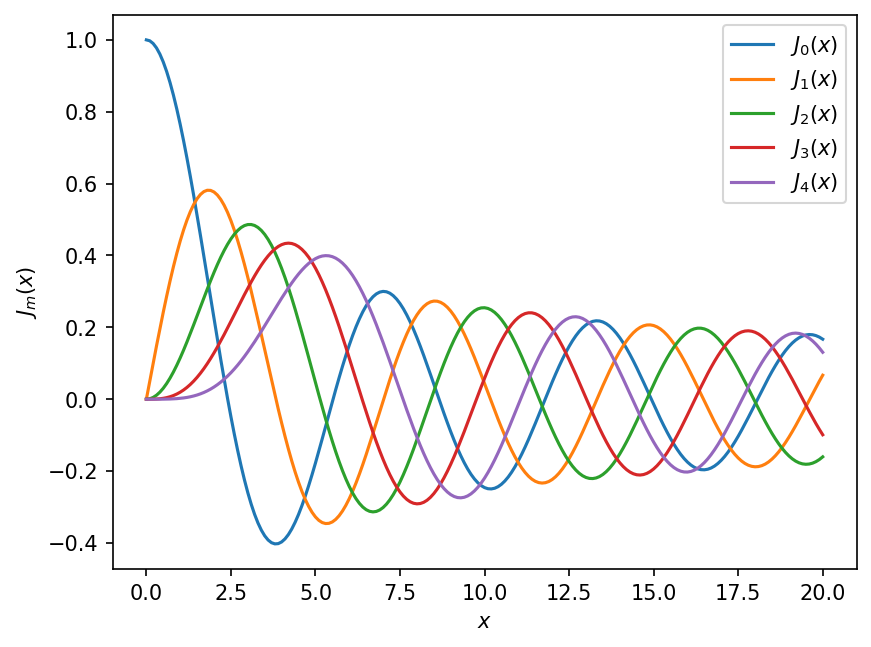

In [10]:
step = 0.1
m_vals = [0,1,2,3,4]
X_vals = np.arange(0, 20+step, step)
plt.figure(dpi=150)
for mVal in m_vals: 
    integ_vals=np.array([Bessel(mVal, xVal).evaluate() for xVal in X_vals])
    text_label = r'$J_{}(x)$'.format(mVal)
    plt.plot(X_vals, integ_vals, label=text_label)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$J_m(x)$')
plt.legend(loc='best')
plt.savefig('Bessel function.png', dpi=300)

**(b)** Make a density plot of the intensity of the circular diffraction pattern with $\lambda = 500$ nm, with $r$ from $0$ to $1\ \mu\text{m}$. 
$$ I(r) = \left[\frac{J_1(kr)}{kr}\right]^2$$
where $k= 2\pi/\lambda$

C:\Users\Ron\AppData\Local\Temp/ipykernel_24920/1588117410.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return ((Bessel(1,kr).evaluate()/kr))**2


Text(0, 0.5, '$I(r)$')

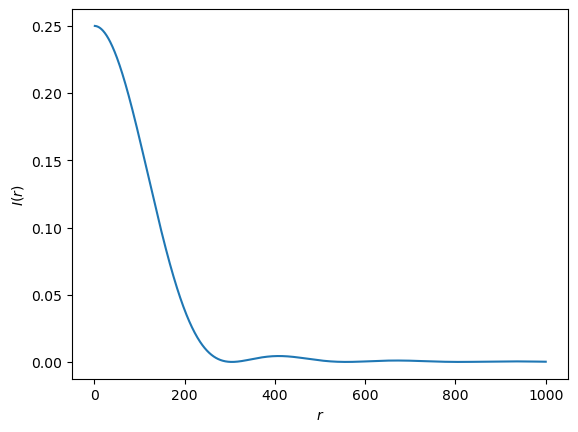

In [11]:
def intensity(r, wavelength):
    kr = (2*np.pi)*r/wavelength
    return ((Bessel(1,kr).evaluate()/kr))**2

r_vals = np.linspace(0,1000, 1000, endpoint=True)
r_vals
intensities = np.array([intensity(r, 500) for r in r_vals])
plt.plot(r_vals, intensities)
plt.xlabel(r'$r$')
plt.ylabel(r'$I(r)$')

## Adaptive Trapezoidal Rule

Calculate the integral 
$$I = \int_0^1 \sin^2 \sqrt{100x}\ \text{d} x$$
using the adaptive trapezoidal rule method

In [12]:
def f(x): #test function
    return (np.sin(np.sqrt(100*x)))**2

def trapz_adapt(f, a, b, epsilon, N=1, debug=False):
    h = (b-a)/N
    points = np.linspace(a,b, N+1)
    size = len(points)
    odds = f(points[[k for k in range(1,size,2)]])
    I_1 = trapezoid(f, a, b, N)
    I_2 = 0.5*I_1 + h*np.sum(odds)
    error = (1/3)*abs(I_1-I_2)
    if debug:
        print(f'Number of Slices: {N}')
        print(f'I_1: {I_1}, I_2: {I_2}') 
        print(f'Accuracy: {error}, Target Accuracy: {epsilon}\n ')
    if error > epsilon:
        return trapz_adapt(f, a, b, epsilon, 2*N, debug=debug)
    else:
        return I_2

trapz_adapt(f, 0, 1, 1e-10, N=1, debug=True)


Number of Slices: 1
I_1: 0.147979484546652, I_2: 0.36994871136663
Accuracy: 0.073989742273326, Target Accuracy: 1e-10
 
Number of Slices: 2
I_1: 0.3252319078064746, I_2: 0.4138581194363859
Accuracy: 0.029542070543303767, Target Accuracy: 1e-10
 
Number of Slices: 4
I_1: 0.5122828507233315, I_2: 0.6058083221817598
Accuracy: 0.031175157152809458, Target Accuracy: 1e-10
 
Number of Slices: 8
I_1: 0.40299744847824825, I_2: 0.3483547473557067
Accuracy: 0.01821423370751385, Target Accuracy: 1e-10
 
Number of Slices: 16
I_1: 0.43010336929474696, I_2: 0.4436563297029963
Accuracy: 0.004517653469416441, Target Accuracy: 1e-10
 
Number of Slices: 32
I_1: 0.4484146657874699, I_2: 0.4575703140338314
Accuracy: 0.0030518827487871674, Target Accuracy: 1e-10
 
Number of Slices: 64
I_1: 0.45391293121537585, I_2: 0.45666206392932884
Accuracy: 0.0009163775713176651, Target Accuracy: 1e-10
 
Number of Slices: 128
I_1: 0.4553485043728022, I_2: 0.4560662909515153
Accuracy: 0.0002392621929043585, Target Accur

0.4558325323669504

## Romberg Integration

Calculate the integral 
$$I = \int_0^1 \sin^2 \sqrt{100x}\ \text{d} x$$
using Romberg integration

In [20]:
def romberg(f, a, b, epsilon, N=1, display=False):
    points = np.linspace(a,b, N+1)
    i, m = 2, 2
    size = len(points) 
    R0, R1 = trapezoid(f,a,b,N), trapezoid(f,a,b,2*N)
    error = (1/(4**(m-1) - 1))*(R1-R0)
    R2 = R1 + error 
    prev_level = np.array([R1,R2])
    if display:
        print(1, R0)
        print(2, *[R1, R2])
    while abs(error) > epsilon: 
        N, i, m = 2*N, i+1, m+1
        curr_level = np.zeros(i)
        curr_level[0] = trapezoid(f,a,b,N)
        for entry in range(m-1):
            new_r = curr_level[entry] + (1/(4**(entry+1)-1))*(curr_level[entry]-prev_level[entry])
            curr_level[entry+1] = new_r
        if display:
            print(i, *curr_level)
        error = (1/(4**(m-1) - 1))*(curr_level[-2]-prev_level[-1])
        prev_level = np.copy(curr_level)
    return curr_level[-1]

def f(x): 
    return x**5

romberg(f, 0, 1, 1e-10, display = True)


1 0.5
2 0.265625 0.1875
3 0.265625 0.265625 0.2708333333333333
4 0.1923828125 0.16796875 0.16145833333333334 0.15972222222222224
5 0.17315673828125 0.166748046875 0.16666666666666666 0.1667493386243386 0.1667768959435626
6 0.16829299926757812 0.1666717529296875 0.16666666666666666 0.16666666666666666 0.1666663424629111 0.16666623439499256
7 0.16707348823547363 0.16666698455810547 0.16666666666666666 0.16666666666666666 0.16666666666666666 0.16666666698358137 0.16666666708921962
8 0.1667683869600296 0.1666666865348816 0.16666666666666666 0.16666666666666666 0.16666666666666666 0.16666666666666666 0.16666666666658927 0.1666666666665635


0.1666666666665635

## Gaussian Quadrature

$$\int_a^{b}f(x)\text{d}x \approx \sum_{k=1}^n w_k' f(x_k')$$
where
$$\begin{align*}
x_k' &= \frac{1}{2}(b-a)x_k + \frac{1}{2}(b+a) \\ 
w_k' &= \frac{1}{2}(b-a)w_k \\ 
w_k &= \int_{-1}^{1}\phi_k(x)\text{d}x 
\end{align*}$$
$\phi_k(x)$ is the interpolating polynomial
$$
\phi_k(x) = \prod_{m=1,\ m\neq k}^N \left(\frac{x-x_m}{x_k-x_m}\right)
$$

Here, $w_k$ is given by 
$$\begin{align*}
w_k = \left[\frac{2}{(1-x^2)}\left(\frac{\text{d}P_n}{\text{d}x}\right)^{-1}\right]_{x=x_k}\
\end{align*}$$
where $P_n$ is the Nth Legendre polynomial $P_N(x)$

In [14]:
import numpy as np

In [15]:
def gaussxw(N):
    '''
        x,w = gaussxw(N) returns integration points x and integration
        weights w such that sum_i w[i]*f(x[i]) is the Nth-order
        Gaussian approximation to the integral int_{-1}^1 f(x) dx
    '''

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    '''
        x,w = gaussxwab(N,a,b) returns integration points and weights
        mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
        is the Nth-order Gaussian approximation to the integral
        int_a^b f(x) dx
    '''
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


In [16]:
def f(x):
    return x**4 - 2*x + 1 

N = 3
a,b = 0.0, 2.0 
x,w = gaussxw(N) 
#Maps unscaled x and w to scaled x and w according to integration bounds a and b
x_mapped, w_mapped = (0.5)*(b-a)*x + (0.5)*(b+a), (0.5)*(b-a)*w 

#Evaluates integral of f(x) using Gaussian estimate
estimate = np.sum(w_mapped*f(x_mapped))
print(estimate)

4.4000000000000075


In [17]:
def trapz_adapt2(f, a, b, epsilon, N=1, debug=False):
    h = (b-a)/N
    points = np.linspace(a,b, N+1)
    size = len(points)
    odds = f(points[[k for k in range(1,size,2)]])
    I_1 = trapezoid(f, a, b, N)
    I_2 = 0.5*I_1 + h*np.sum(odds)
    error = (1/3)*abs(I_1-I_2)
    if debug:
        print(f'Number of Slices: {N}')
        print(f'I_1: {I_1}, I_2: {I_2}') 
        print(f'Accuracy: {error}, Target Accuracy: {epsilon}\n ')
    if error > epsilon:
        return trapz_adapt(f, a, b, epsilon, 2*N, debug=debug)

print(trapz_adapt2(f, 0, 1, 1e-10, N=1, debug=False))

0.19999999996119489


## Integrals over Infinite Ranges

Example: Evaluate 
$$ I = \int_0^{\infty}e^{-t^2}\text{d}t $$
using Gaussian quadrature. 

Here, we perform the substitution
$$\begin{align*}
t &= \frac{x}{1+x} \\ 
\text{d}t &= \frac{\text{d}x}{(1-x)^2}
\end{align*}$$
such that the integral becomes
$$
I = \int_0^{1} \frac{1}{(1-x)^2}\text{exp}\left[-\left(\frac{x}{1+x}\right)^2\right]\text{d}x
$$

In [18]:
def new_integrand(x):
    # return np.exp(-x**2/(1-x)**2)/(1-x)**2
    return np.exp(-(x/(1-x))**2)/(1-x)**2

N = 100
a,b = 0.0, 1.0 
x, w = gaussxw(N) 
xp, wp = (0.5)*(b-a)*x + (0.5)*(b+a), 0.5*(b-a)*w 

estimate = np.sum(wp*new_integrand(xp))
print('Estimate:', estimate)
error = abs(estimate - np.sqrt(np.pi)/2)
print('Error:', error)

Estimate: 0.8862269254527582
Error: 2.220446049250313e-16
